In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
def read_data(filename, data_dir='data'):
    df = pd.read_csv(os.path.join(data_dir, filename), index_col=0)
    df.fillna('?', inplace=True)
    return df

df_train = read_data('diab_train_filtered.csv')
df_val = read_data('diab_validation_filtered.csv')
df_test = read_data('diab_test_filtered.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 9011 to 1625
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      6000 non-null   object
 1   gender                    6000 non-null   object
 2   age                       6000 non-null   object
 3   admission_type_id         6000 non-null   object
 4   discharge_disposition_id  6000 non-null   object
 5   admission_source_id       6000 non-null   object
 6   time_in_hospital          6000 non-null   int64 
 7   num_lab_procedures        6000 non-null   int64 
 8   num_procedures            6000 non-null   int64 
 9   num_medications           6000 non-null   int64 
 10  number_outpatient         6000 non-null   int64 
 11  number_emergency          6000 non-null   int64 
 12  number_inpatient          6000 non-null   int64 
 13  diag_1                    6000 non-null   object
 14  diag_2               

### Race
The dataset is highly unbalanced when it comes to this variable, being dominated by caucasian patients. Despite this, race by itself it does not seem to be a good predictor of the proportion of readmitted patients.

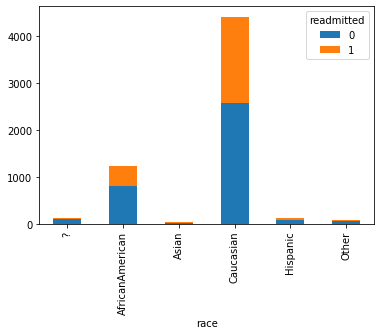

In [86]:
pd.crosstab(df_train.race, df_train.readmitted).plot(kind='bar', stacked=True)

### Gender
Dataset is much more balanced with respect to this variable, but this also does not seem to be a strong predictor by itself.

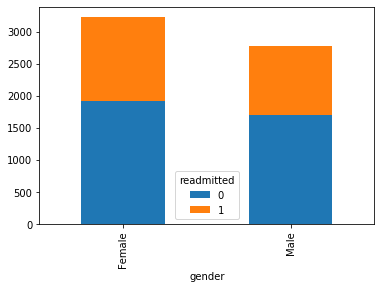

In [85]:
pd.crosstab(df_train.gender, df_train.readmitted).plot(kind='bar', stacked=True)

### Age
Younger patients seem to have a much lower readmission rate. Potentially an important feature.

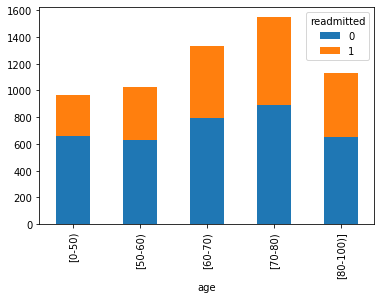

In [84]:
pd.crosstab(df_train.age, df_train.readmitted).plot(kind='bar', stacked=True)

### Time in hospital
This seems to be a very useful predictor of readmission, with those that spend less time in the hospital in the first place making up a smaller proportion of patients that get readmitted. 

However, it is interesting but perhaps unsurprising to note that the older population tends to be dominant once we look at longer stays. This suggests these 2 features are most likely highly dependent.

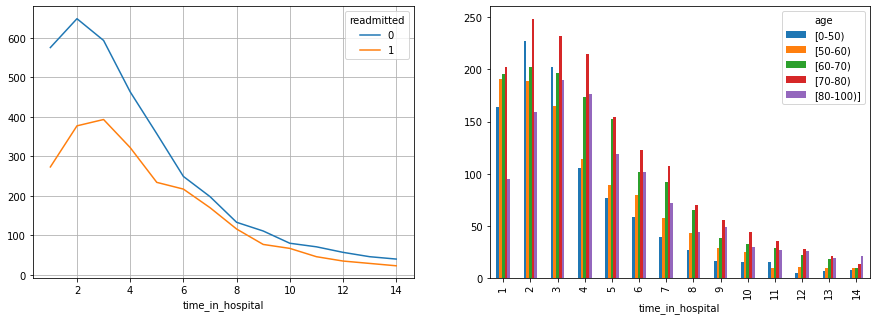

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
pd.crosstab(df_train.time_in_hospital, df_train.readmitted).plot(kind='line', ax=ax[0], grid=True)
pd.crosstab(df_train.time_in_hospital, df_train.age).plot(kind='bar', ax=ax[1])

From this plot we can confirm that most patients with lengthy stays are older and that stays of up to 3 days tend to not be readmitted.

Hover over the **time_in_hospital** column to confirm these trends and explore the age group of these patients and their readmission tendencies.

## Please re-run this cell to be able to see the visualization

In [83]:
px.parallel_categories(df_train[['age', 'time_in_hospital', 'readmitted']], color="time_in_hospital", color_continuous_scale=px.colors.sequential.Inferno)

### Use of Hospital Services
We also explore the potential connection between the number of lab procedures, procedures and medications with readmission. From the plots, it seems possible that a lower number of procedures and medications is correlated with a lower chance of readmission. 

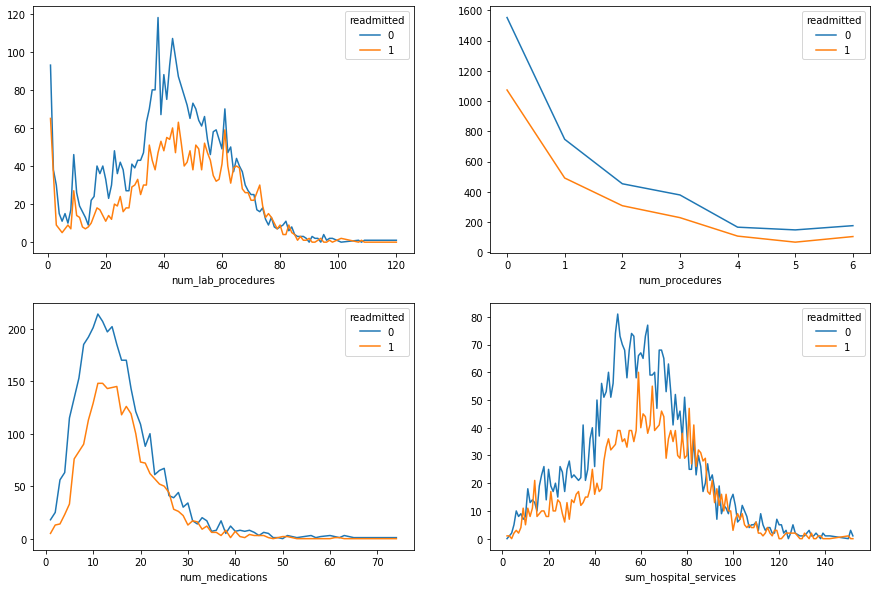

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
df_train['sum_hospital_services'] = df_train['num_lab_procedures'] + df_train['num_procedures'] + df_train['num_medications']
pd.crosstab(df_train.num_lab_procedures, df_train.readmitted).plot(kind='line', ax=ax[0][0])
pd.crosstab(df_train.num_procedures, df_train.readmitted).plot(kind='line', ax=ax[0][1])
pd.crosstab(df_train.num_medications, df_train.readmitted).plot(kind='line', ax=ax[1][0])
pd.crosstab(df_train.sum_hospital_services, df_train.readmitted).plot(kind='line', ax=ax[1][1])